In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fe53b184f367847aa55a2617e1b05248cac098b2c3dd14dae217169b3ce2e42b10bcc2af6d9b6787a4792a557f9705bb1eba86d761f2407d2'

In [4]:
import aocd
from aocd.models import Puzzle
day = 14
year = 2022
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [7]:
test_data = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9"""

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)

In [98]:
data = puzzle.input_data.splitlines()
# data = test_data.splitlines()
len(data), data[:10]

(138,
 ['508,146 -> 513,146',
  '514,142 -> 519,142',
  '483,88 -> 487,88',
  '522,146 -> 527,146',
  '492,90 -> 496,90',
  '525,161 -> 525,156 -> 525,161 -> 527,161 -> 527,156 -> 527,161 -> 529,161 -> 529,154 -> 529,161 -> 531,161 -> 531,154 -> 531,161 -> 533,161 -> 533,157 -> 533,161 -> 535,161 -> 535,152 -> 535,161 -> 537,161 -> 537,160 -> 537,161',
  '508,93 -> 508,97 -> 507,97 -> 507,101 -> 517,101 -> 517,97 -> 510,97 -> 510,93',
  '525,161 -> 525,156 -> 525,161 -> 527,161 -> 527,156 -> 527,161 -> 529,161 -> 529,154 -> 529,161 -> 531,161 -> 531,154 -> 531,161 -> 533,161 -> 533,157 -> 533,161 -> 535,161 -> 535,152 -> 535,161 -> 537,161 -> 537,160 -> 537,161',
  '486,86 -> 490,86',
  '489,84 -> 493,84'])

In [131]:
def parse(data):
    res = []
    for line in data:
        points = line.split(' -> ')
        points = [tuple(map(int, p.split(','))) for p in points]
        res.append(points)
    return res

def find_max(data):
    maxx = 500
    minx = 500
    maxy = 0
    for line in data:
        for point in line:
            x, y = point
            maxx = max(maxx, x)
            minx = min(minx, x)
            maxy = max(maxy, y)
    return minx, maxx, maxy

def create_cave_B(data, minx, maxx, maxy):
    maxy += 2
    minx = min(minx, 500 - maxy)
    maxx = max(maxx, 500 + maxy)
    width = (maxx - minx) + 1
    height = maxy + 1
    cave = np.zeros((height, width), dtype=np.int8)
    cave[maxy, :] = 1
    for line in data:
        frm = line[0]
        for tgt in line[1:]:
            xslice = sorted((frm[1], tgt[1]))
            xslice[1] += 1
            xslice = slice(xslice[0], xslice[1])
            
            yslice = sorted(((frm[0]-minx), (tgt[0]-minx)))
            yslice[1] += 1
            yslice = slice(yslice[0], yslice[1])
            
            cave[xslice, yslice] = 8
            frm = tgt
    return cave, 500 - minx

def create_cave(data, minx, maxx, maxy):
    width = (maxx - minx) + 1
    height = maxy + 1
    cave = np.zeros((height, width), dtype=np.int8)
    for line in data:
        frm = line[0]
        for tgt in line[1:]:
            xslice = sorted((frm[1], tgt[1]))
            xslice[1] += 1
            xslice = slice(xslice[0], xslice[1])
            
            yslice = sorted(((frm[0]-minx), (tgt[0]-minx)))
            yslice[1] += 1
            yslice = slice(yslice[0], yslice[1])
            
            cave[xslice, yslice] = 8
            frm = tgt
    return cave, 500 - minx

def drop_sand(cave, dropx):
    x, y = dropx, 0
    while True:   
        try:
            if cave[y+1, x] == 0:
                y += 1
            elif cave[y+1, x-1] == 0:
                y += 1
                x -= 1
            elif cave[y+1, x+1] == 0:    
                y += 1
                x += 1
            else:
                cave[y, x] = 4
                if y == 0:
                    return cave, False
                return cave, True
        except IndexError:
            return cave, False

def fill_cave(cave, dropx):
    while True:
        cave, cont = drop_sand(cave, dropx)
        if not cont:
            break
    return cave

In [142]:
d = parse(data)
cave, dropx = create_cave(d, *find_max(d))
cave

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 8, 0, 0],
       [0, 0, 0, ..., 8, 0, 8],
       [0, 0, 0, ..., 8, 8, 8]], dtype=int8)

In [143]:
cave = fill_cave(cave, dropx)

In [144]:
cave

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 8, 0, 0],
       [0, 0, 0, ..., 8, 0, 8],
       [0, 0, 0, ..., 8, 8, 8]], dtype=int8)

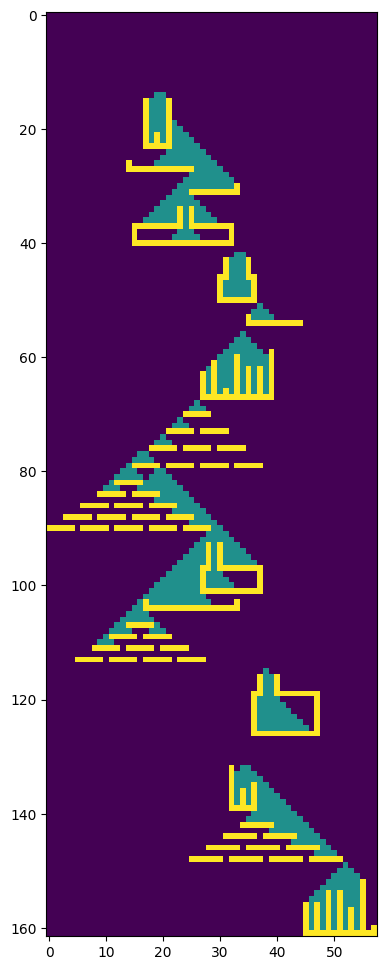

In [145]:
plt.imshow(cave)

In [116]:
(cave==4).sum()

674

In [118]:
puzzle.answer_a = str((cave==4).sum())

# Part 2

In [146]:
d = parse(data)
cave, dropx = create_cave_B(d, *find_max(d))
cave

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)

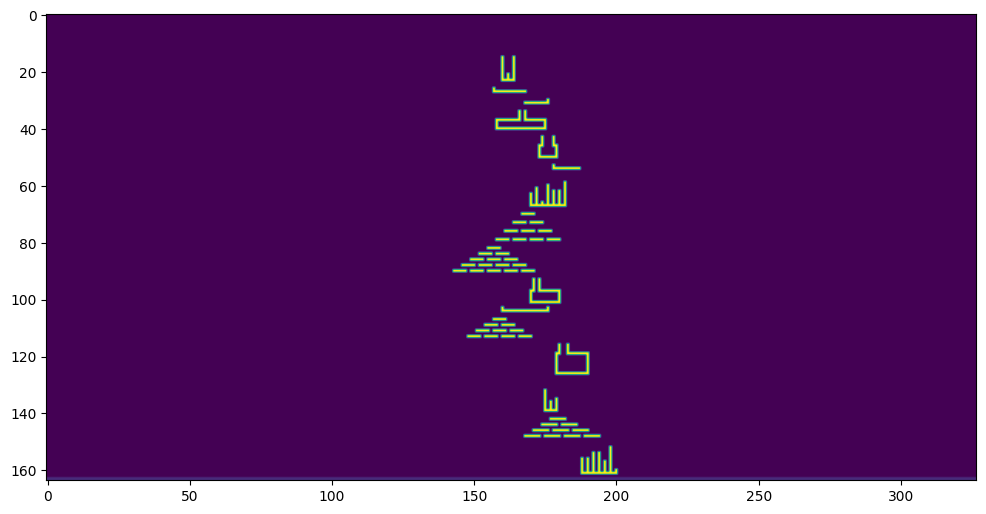

In [147]:
plt.imshow(cave)

In [148]:
%%time
cave = fill_cave(cave, dropx)

CPU times: user 9.91 s, sys: 8.1 ms, total: 9.92 s
Wall time: 9.93 s


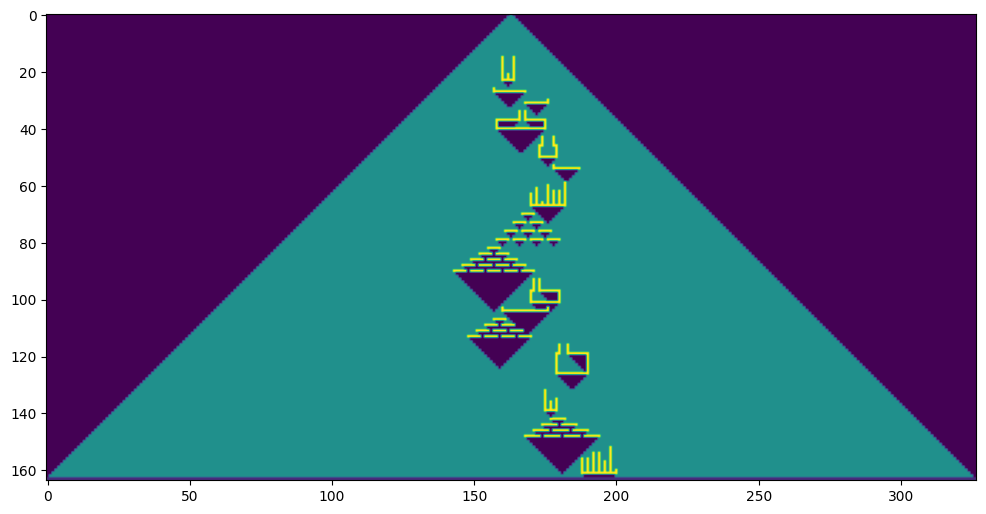

In [149]:
plt.imshow(cave)

In [150]:
(cave==4).sum()

24958

In [139]:
puzzle.answer_b = str((cave==4).sum())

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 14! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
